In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
import matplotlib.cm as cm
colormap = cm.get_cmap("hsv")

C:\Users\alexk\AppData\Local\Temp\ipykernel_20940\2988994069.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap("hsv")


In [2]:
m30_v30_L2_s3=torch.tensor([[[100.0000,  66.6667,  47.1698,   0.2391,  54.4400],
         [100.0000,  91.6947,  33.3333,   0.4208,  91.9800],
         [100.0000,  90.1619,  34.6154,   0.3534,  96.2200],
         [100.0000,  91.0714,  66.6667,   0.0000,  98.2400],
         [ 99.8968,  84.8101,   0.0000,   0.0000,  98.7800],
         [ 99.8175,  84.5455,   0.0000,   3.7037,  99.3900],
         [ 99.8893,  71.9298,   0.0000,  28.5714,  99.6700],
         [ 99.8897,  76.9231,   0.0000,   0.0000,  99.8000],
         [ 99.8799,  66.6667,   0.0000,   0.0000,  99.8600],
         [ 99.9500,  66.6667,   0.0000,   0.0000,  99.9300]],

        [[100.0000,  91.1876,  58.2467,   6.5570,  53.0500],
         [100.0000,  77.3278,  26.4493,   2.4512,  65.9100],
         [ 99.9687,  84.7733,  33.1445,   1.0846,  84.9400],
         [ 99.8752,  83.3333,  29.8851,   1.0204,  92.4300],
         [ 99.8303,  73.3119,  12.2449,   1.1173,  95.1600],
         [ 99.8296,  71.1198,   5.0000,   3.2258,  97.3900],
         [ 99.7523,  64.7287,   7.1429,   0.0000,  98.3200],
         [ 99.8169,  71.7105,   0.0000,   0.0000,  99.2300],
         [ 99.8992,  59.2105,   0.0000,   0.0000,  99.5200],
         [ 99.8495,  56.6667,   0.0000,   0.0000,  99.6800]],

        [[100.0000,  98.9570,  50.2857,   3.7816,  19.3200],
         [100.0000,  89.0770,  31.1391,   2.7166,  31.1800],
         [ 99.2614,  72.4537,  21.9251,   3.8049,  47.3400],
         [ 98.0642,  60.9978,  17.8674,   4.2028,  61.0500],
         [ 96.6519,  55.6333,  14.1401,   2.8103,  71.0200],
         [ 98.0897,  54.6907,  12.1756,   5.0746,  82.2500],
         [ 98.7959,  60.4671,  12.9707,   5.4945,  91.3000],
         [ 99.3061,  64.3609,  20.7921,   0.0000,  96.0800],
         [ 99.6796,  66.4452,  14.2857,   0.0000,  98.4900],
         [ 99.8076,  74.3802,   0.0000,   0.0000,  99.4600]],

        [[100.0000,  98.6111,  66.2005,   3.3720,   6.8400],
         [100.0000,  86.1345,  37.7234,   2.6428,   8.6900],
         [ 96.9298,  62.3377,  18.4925,   3.2979,  14.8100],
         [ 88.6705,  46.9539,  14.9302,   3.2641,  23.9500],
         [ 87.7171,  41.0492,  11.1928,   3.7833,  36.7800],
         [ 92.4408,  40.6961,  10.1968,   4.7841,  56.1200],
         [ 95.9715,  50.2356,  15.6479,   4.3478,  78.0100],
         [ 98.5575,  67.0742,  25.2137,   8.0000,  93.0100],
         [ 99.6109,  83.2967,  34.2857,   0.0000,  98.6400],
         [ 99.8289,  83.6066,   0.0000,   0.0000,  99.7200]],

        [[  0.0000, 100.0000,  73.9884,   3.0284,   4.4500],
         [100.0000,  80.8511,  38.9503,   3.3479,   5.0300],
         [100.0000,  65.9574,  18.9621,   3.7619,   6.2100],
         [ 78.5714,  37.5573,  11.2743,   3.4840,   8.1500],
         [ 75.4777,  34.5238,  11.4577,   3.4531,  16.3100],
         [ 79.0350,  34.1337,  10.0638,   4.1049,  32.5900],
         [ 89.1887,  45.2910,  16.5295,   6.7055,  64.2000],
         [ 98.3753,  80.8771,  51.1111,  30.7692,  94.7900],
         [ 99.8776,  93.2292,  83.3333,   0.0000,  99.7400],
         [ 99.9800, 100.0000,   0.0000,   0.0000,  99.9800]],

        [[  0.0000, 100.0000,  70.3704,   3.4099,   3.6100],
         [100.0000, 100.0000,  38.8889,   3.4786,   3.8900],
         [  0.0000,  66.6667,  19.7605,   3.2121,   3.8600],
         [  0.0000,  43.4783,  14.3008,   3.8504,   5.1100],
         [ 74.0741,  36.0656,  12.9736,   3.4420,   7.3400],
         [ 67.1388,  26.3554,  10.7545,   4.1379,  13.5500],
         [ 59.0600,  33.0250,  16.8196,   9.0634,  37.8600],
         [ 99.4951,  96.1078,  81.8182, 100.0000,  99.2300],
         [100.0000, 100.0000,   0.0000,   0.0000, 100.0000],
         [100.0000,   0.0000,   0.0000,   0.0000, 100.0000]]])
ptr_list=torch.tensor([3.1623e+01, 1.0000e+02, 3.1623e+02, 1.0000e+03, 3.1623e+03, 1.0000e+04,
        3.1623e+04, 1.0000e+05, 3.1623e+05, 1.0000e+06], dtype=torch.float64)

m30_v30_L2_s3.size()

torch.Size([6, 10, 5])

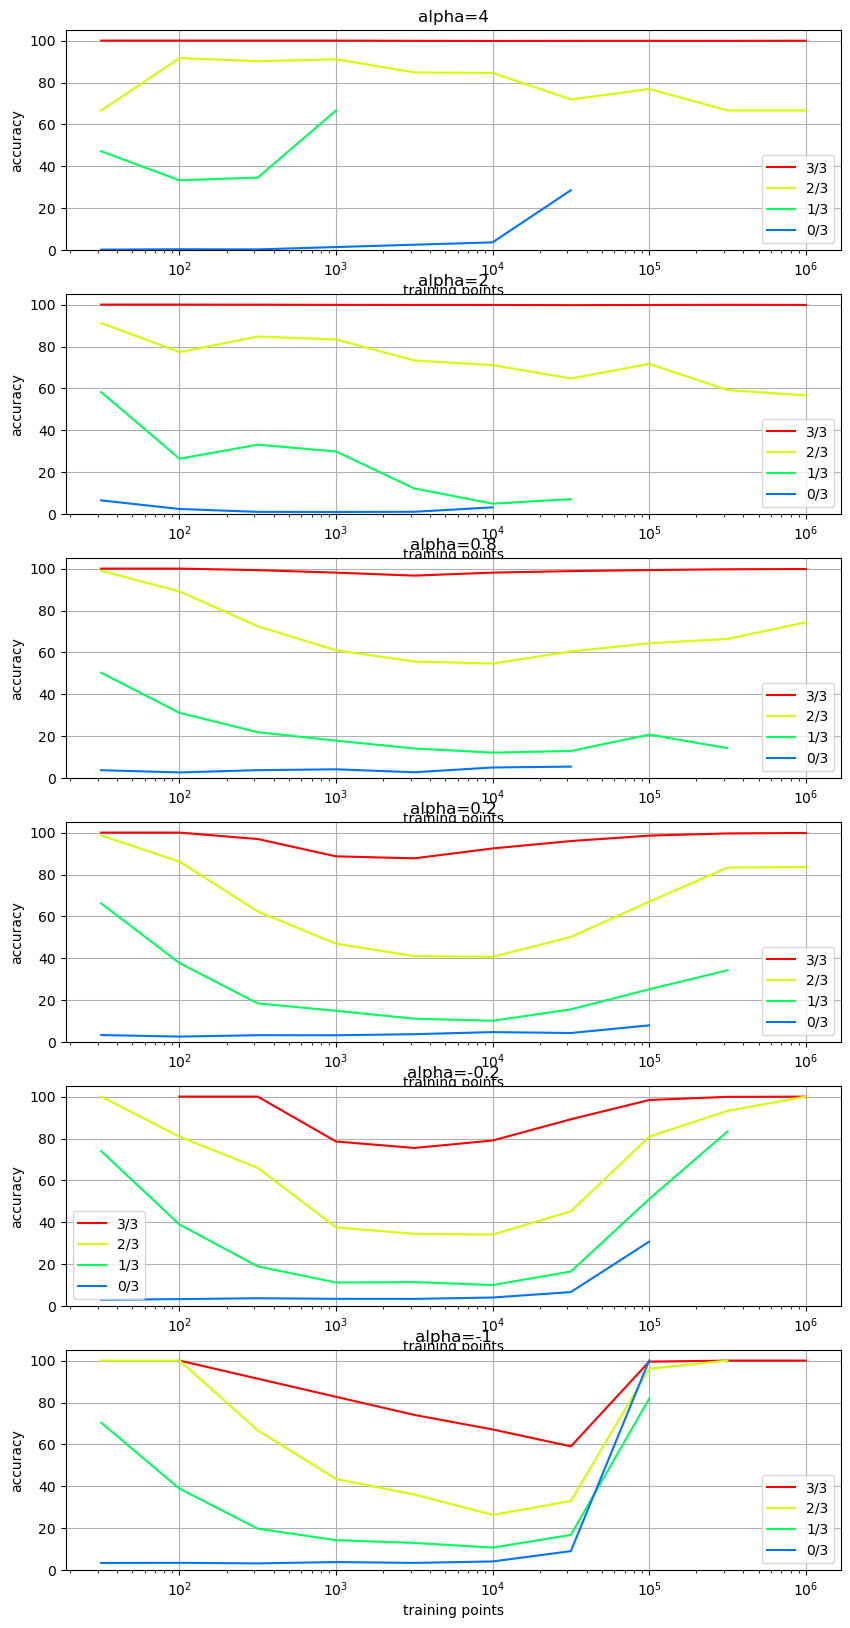

In [7]:
fig, axis = plt.subplots(6, 1, figsize=(10, 20))
temperature_list = [4, 2, 0.8, 0.2, -0.2, -1]
title_list = ["3/3", "2/3", "1/3","0/3"]
for j in range(6):
    for i in range(4):
        data = m30_v30_L2_s3[j, :, i].numpy()
        non_zero_indices = np.where(data != 0)[0]
        axis[j].semilogx(ptr_list[non_zero_indices], data[non_zero_indices], color=colormap(i/5), label=title_list[i])
    axis[j].legend()
    axis[j].set_ylim(0, 105)
    axis[j].set_title(f"alpha={temperature_list[j]}")
    axis[j].grid()  
    axis[j].set_xlabel("training points")
    axis[j].set_ylabel("accuracy")
    